In [ ]:
# Author: Riley Owens (GitHub: mrileyowens)

# This file displays an example training 
# spectrum GaussPy+ has fit in a region
# and then produces a map showing the 
# number of fitted Gaussian components
# in the decomposed regions.

In [1]:
import os

import lmfit

import numpy as np

import pickle

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from multiprocessing import process

from pylab import cm

from gausspyplus.plotting import plot_spectra, get_points_for_colormap, shiftedColorMap
from gausspyplus.training_set import GaussPyTrainingSet
from gausspyplus.training import GaussPyTraining
from gausspyplus.prepare import GaussPyPrepare
from gausspyplus.decompose import GaussPyDecompose
from gausspyplus.spatial_fitting import SpatialFitting
from gausspyplus.finalize import Finalize

from astropy.io import fits
from astropy.wcs import WCS

In [2]:
# Establishing directories
home='/home/jovyan/work/custom/'
data=home+'data'
figs=home+'figs'

In [3]:
# Function to add axis labels
def add_style(ax):
    ax.set_xlabel('Galactic Longitude')
    ax.set_ylabel('Galactic Latitude')

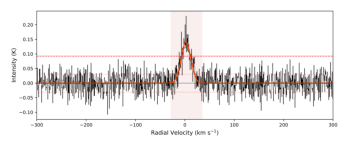

In [9]:
# Creating velocity-space spectrograph of
# example fitted spectrum
img = mpimg.imread(figs+'/exSpectra.png')
imgplot = plt.imshow(img)
plt.axis('off')
imgplot.axes.get_xaxis().set_visible(False)
imgplot.axes.get_yaxis().set_visible(False)
plt.show()

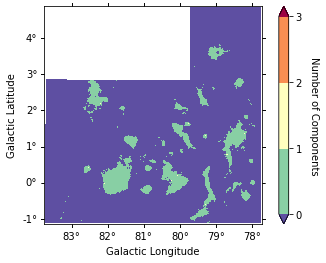

In [18]:
# Establishing filepath to component data mosaic
filepath = os.path.join(data,'cygx_comp_mosaic.fits')

# Extracting WCS to be used
wcs = WCS(fits.getheader(filepath))

# Initializing figure
fig, ax = plt.subplots(ncols=1, subplot_kw=dict(projection=wcs))

# Extracting component data
ncomps = fits.getdata(os.path.join(data,'cygx_comp_mosaic.fits'))

# Making colorscale
new_cmap = cm.get_cmap('Spectral_r', 5)

# Making colorscale with discrete bounds
bounds = [0,1,2,3]
norm = mpl.colors.BoundaryNorm(bounds, new_cmap.N, extend='both')

# Plotting component data with colorscale
img_ncomps = ax.imshow(ncomps, cmap=new_cmap, vmin=0, vmax=3)
cbar=plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=new_cmap),ax=ax,fraction=0.047*(ncomps.shape[0]/ncomps.shape[1]))
cbar.set_label('Number of Components',rotation=270,labelpad=17.0)
add_style(ax)

fig.savefig(os.path.join(figs,'ncompMap.png'),dpi=200,bbox_inches='tight')

plt.show()